In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


**Load and explore dataset:**

In [2]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")

In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
display(df.head(10))
display(df.shape)
display(df.columns)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


(136429, 14)

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

<Axes: xlabel='Machine failure', ylabel='Count'>

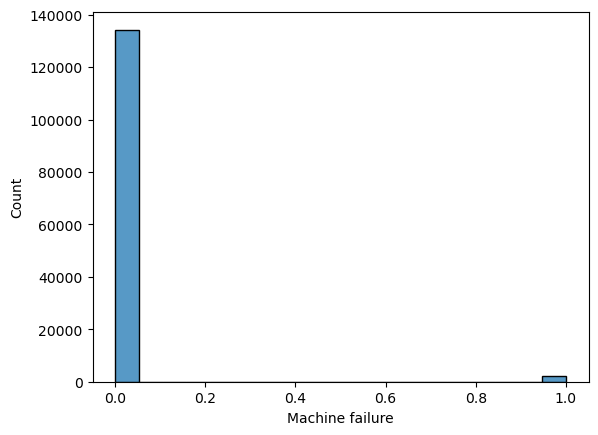

In [4]:
sns.histplot(data = df, x = "Machine failure")

> Need to find a way to handle imbalanced dataset

In [5]:
num_fail = len(df[df["Machine failure"] == 1])
num_pass = len(df[df["Machine failure"] == 0])

* ID = device identifier (int)
* Product ID = Unique ID (string)
* Type = type of product L = low (60% of data), M = medium (30% of data), H = high (10% of data) (string)
* Air Temp = air temp in kelvin (float)
* Process temp = (float)
* rotational speed = speed in rpm (int)
* torque = newton meter (float)
* tool wear = time unit needed to wear down the product/tool (int)
* machine failure = binary failure target variable (int)
* 
* TWF = tool wear failure (binary, int)
* HDF = heat dissipation failure (binary, int)
* PWF = power failure (binary, int)
* OSF = overstain failure (binary, int)
* RNF = random failure (binary, int)

In [6]:
df.nunique(axis = 0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dropna(axis = 0)
df.shape

(136429, 14)

**Explore relationships between predictor and target variables**

/tmp/ipykernel_20/2500072798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

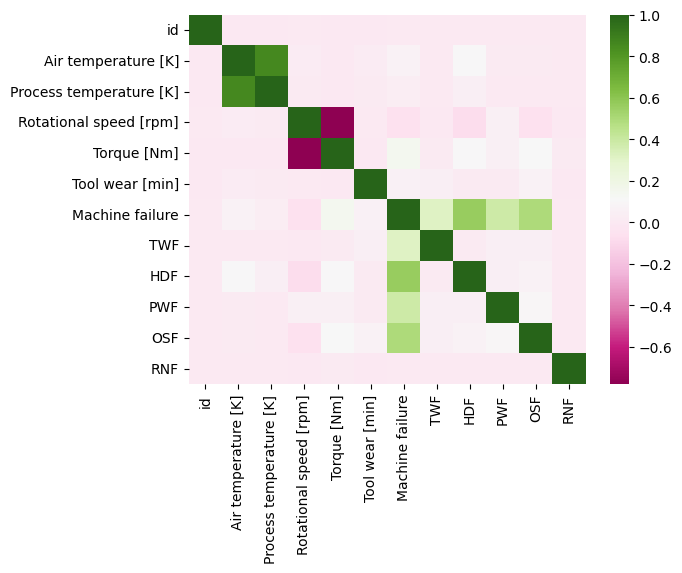

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
           annot = False, cmap = "PiYG")

In [9]:
df.rename(columns = {df.columns[3] : "AirTemp", df.columns[4] : "ProcessTemp", df.columns[5]: "RotSpeed", df.columns[6] : "Torque", df.columns[7]:"ToolWear"}, inplace = True)
df.columns

Index(['id', 'Product ID', 'Type', 'AirTemp', 'ProcessTemp', 'RotSpeed',
       'Torque', 'ToolWear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [10]:
df = df.drop(["Product ID"], axis = 1)
df.columns

Index(['id', 'Type', 'AirTemp', 'ProcessTemp', 'RotSpeed', 'Torque',
       'ToolWear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [11]:
df.set_index('id', inplace = True)
df.columns

Index(['Type', 'AirTemp', 'ProcessTemp', 'RotSpeed', 'Torque', 'ToolWear',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

**Categorize type of predictor variables**

/tmp/ipykernel_20/2469373344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr()


<Axes: >

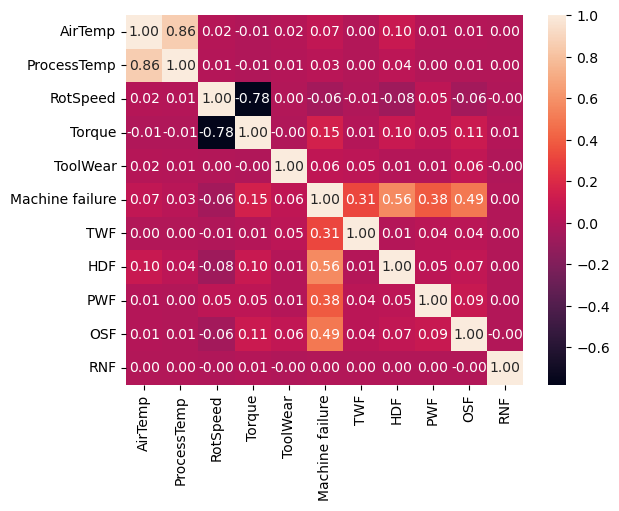

In [12]:
corr1 = df.corr()
sns.heatmap(corr1, annot = True, fmt = '.2f')

**Dataset Preprocessing:**

1. Train - Validation split
2. Missing values = no missing values in this dataset
3. Encoding categorical variables
4. Data normalization

In [13]:
complete_train = df.drop(["Machine failure"], axis = 1)
complete_y = df["Machine failure"]

# Splitting dataset into training and validation sets (75-25)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(complete_train, complete_y)

train_X.head()

,Type,AirTemp,ProcessTemp,RotSpeed,Torque,ToolWear,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,
42323,M,297.4,309.1,1461,41.9,202,0,0,0,0,0
59701,L,301.3,310.6,1435,47.8,106,0,0,0,0,0
111333,M,300.9,310.4,1444,40.6,150,0,0,0,0,0
81415,L,298.0,309.5,1567,37.6,48,0,0,0,0,0
84261,L,299.2,308.8,1384,49.2,176,0,0,0,0,0


In [14]:
# Variable types:
# Continuous = ["AirTemp", "ProcessTemp", "RotSpeed", "Torque", "ToolWear"]
# Categorical = ["Type"]

# Normalize continuous variables:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformers = [
    ('cat', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), ['Type']),
    ('num', StandardScaler(), ['AirTemp', 'ProcessTemp', 'RotSpeed', 'Torque', 'ToolWear']),
    ('skip', 'passthrough', ['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
]

col_transformer = ColumnTransformer(transformers)

#train_X_num = pd.DataFrame(sc.fit_transform(train_X_num), columns = train_X_num.columns)
#val_X_num = pd.DataFrame(sc.transform(val_X_num), columns = val_X_num.columns)

#train_X_num.head()

train_X_new = pd.DataFrame(col_transformer.fit_transform(train_X), columns = col_transformer.get_feature_names_out())
val_X_new = pd.DataFrame(col_transformer.transform(val_X), columns = col_transformer.get_feature_names_out())

train_X_new.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__AirTemp,num__ProcessTemp,num__RotSpeed,num__Torque,num__ToolWear,skip__TWF,skip__HDF,skip__PWF,skip__OSF,skip__RNF
0,0.0,0.0,1.0,-1.322190,-0.606611,-0.429505,0.182309,1.527635,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.774353,0.476593,-0.617769,0.875759,0.025978,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.559323,0.332166,-0.552600,0.029515,0.714238,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,-0.999645,-0.317757,0.338032,-0.323087,-0.881273,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,-0.354555,-0.823252,-0.987056,1.040306,1.120936,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

Model accuracy =  0.980092646886361
Logistic Regression AUROC =  0.9291090321837762


<Axes: >

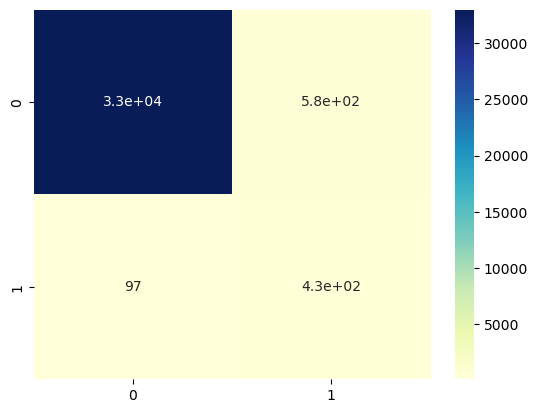

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fit a logistic regression model on train_X_new and train_y

model = LogisticRegression(solver = "newton-cholesky", class_weight = "balanced")
model.fit(train_X_new, train_y)

# Predict class probabilities for validation set

pred_y = model.predict(val_X_new)

val_probs = model.predict_proba(val_X_new)

# Calculate accuracy of prediction using AUROC curve scores

auc_score = roc_auc_score(val_y, val_probs[:,1])

print("Model accuracy = ", accuracy_score(val_y, pred_y))
print("Logistic Regression AUROC = ", auc_score)

cm = pd.DataFrame(confusion_matrix(val_y, pred_y))
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

In [16]:
test_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [17]:
# Prediction 1 using simple logistic regression on the test set (submission 1)

# Apply data transformations as before
test_df.rename(columns = {test_df.columns[3] : "AirTemp", test_df.columns[4] : "ProcessTemp", test_df.columns[5]: "RotSpeed", test_df.columns[6] : "Torque", test_df.columns[7]:"ToolWear"}, inplace = True)
test_df = test_df.drop(["Product ID"], axis = 1)
test_df.set_index('id', inplace = True)

#test_df.columns

test_df_new = pd.DataFrame(col_transformer.transform(test_df), columns = col_transformer.get_feature_names_out())
test_df_new.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__AirTemp,num__ProcessTemp,num__RotSpeed,num__Torque,num__ToolWear,skip__TWF,skip__HDF,skip__PWF,skip__OSF,skip__RNF
0,0.0,1.0,0.0,1.311928,1.126516,-0.154350,-0.276073,-0.693566,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.989383,0.765448,1.395206,-1.357385,-1.366183,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.774353,0.332166,0.033914,-0.311333,-0.130444,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.129263,-0.245543,-0.299168,0.852252,-1.553890,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.903261,1.704225,-0.038495,0.111788,0.151116,0.0,0.0,0.0,0.0,0.0


In [18]:
test_df.index

Int64Index([136429, 136430, 136431, 136432, 136433, 136434, 136435, 136436,
            136437, 136438,
            ...
            227373, 227374, 227375, 227376, 227377, 227378, 227379, 227380,
            227381, 227382],
           dtype='int64', name='id', length=90954)

# Logistic Regression with Cross-Validation

In [19]:
pred_sub = model.predict_proba(test_df_new)[:,1]
sub1 = pd.DataFrame(pred_sub, columns = ['Machine failure'])
#ex_col = test_df[["id"]]
ex_col = pd.DataFrame(test_df.index)
submission = ex_col.join(sub1)

submission.head()
#test_df.index
submission.to_csv("submission_logreg.csv", index = False)

In [20]:
from sklearn.model_selection import cross_val_score

train_X_complete = pd.DataFrame(col_transformer.fit_transform(complete_train), columns = col_transformer.get_feature_names_out())

cv_scores = cross_val_score(model, train_X_complete, complete_y, cv = 5, scoring = 'roc_auc')

print("Cross validation AUROC = ", cv_scores.mean())

Cross validation AUROC =  0.9359037747911187


5-fold cross validation performs only slightly better than logistic regression

# Decision Tree Classifier

Model accuracy =  0.9917028263164067
Decision Tree AUROC =  0.8707067158281998


<Axes: >

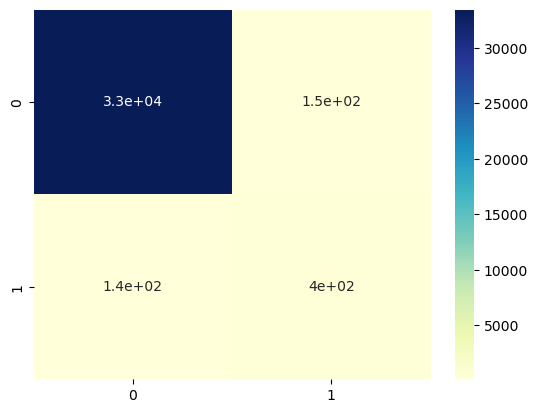

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight = 'balanced')

model_dt.fit(train_X_new, train_y)

pred_y = model_dt.predict(val_X_new)

val_probs = model_dt.predict_proba(val_X_new)

# Calculate accuracy of prediction using AUROC curve scores

auc_score = roc_auc_score(val_y, val_probs[:,1])

print("Model accuracy = ", accuracy_score(val_y, pred_y))
print("Decision Tree AUROC = ", auc_score)

cm = pd.DataFrame(confusion_matrix(val_y, pred_y))
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

> Does slighly poorer than simple logistic regression.. try tuning params to see if it does better?

# Random Forest Classifier

Model accuracy =  0.995983347015363
Random Forest AUROC =  0.9375086759853271


<Axes: >

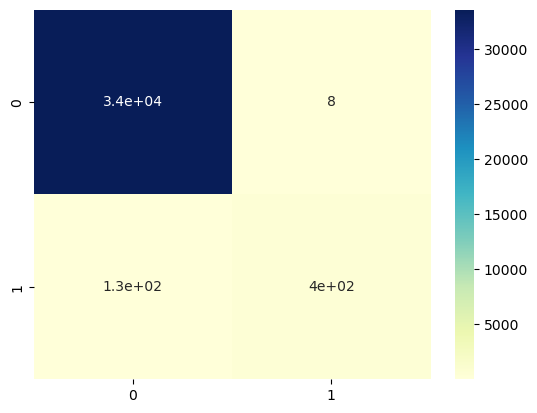

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight = 'balanced')

model_rf.fit(train_X_new, train_y)

pred_y = model_rf.predict(val_X_new)

val_probs = model_rf.predict_proba(val_X_new)

# Calculate accuracy of prediction using AUROC curve scores

auc_score = roc_auc_score(val_y, val_probs[:,1])

print("Model accuracy = ", accuracy_score(val_y, pred_y))
print("Random Forest AUROC = ", auc_score)

cm = pd.DataFrame(confusion_matrix(val_y, pred_y))
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

In [23]:
pred_sub = model_rf.predict_proba(test_df_new)[:,1]
sub1 = pd.DataFrame(pred_sub, columns = ['Machine failure'])
ex_col = pd.DataFrame(test_df.index)
submission = ex_col.join(sub1)
submission.to_csv("submission_rf.csv", index = False)
submission.head()

,id,Machine failure
0,136429,0.00
1,136430,0.01
2,136431,0.00
3,136432,0.00
4,136433,0.01


Trying XGBoost to see if it performs better..

# XGBoost Classifier

Model accuracy =  0.9958074352058168
XGBoost AUROC =  0.9540807824744619


<Axes: >

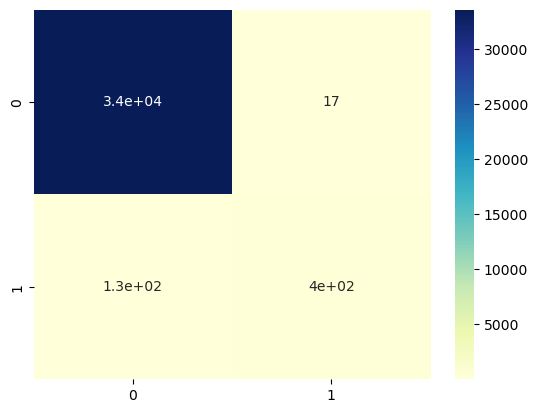

In [24]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(train_X_new, train_y)

pred_y = model_xgb.predict(val_X_new)

val_probs = model_xgb.predict_proba(val_X_new)

# Calculate accuracy of prediction using AUROC curve scores

auc_score = roc_auc_score(val_y, val_probs[:,1])

print("Model accuracy = ", accuracy_score(val_y, pred_y))
print("XGBoost AUROC = ", auc_score)

cm = pd.DataFrame(confusion_matrix(val_y, pred_y))
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

In [25]:
# XGBoost with cross-validation

cv_scores = cross_val_score(model_xgb, train_X_complete, complete_y, cv = 5, scoring = 'roc_auc')

print("XGBoost Cross validation AUROC = ", cv_scores.mean())

XGBoost Cross validation AUROC =  0.9610016307820833


In [26]:
pred_sub = model_xgb.predict_proba(test_df_new)[:,1]
sub1 = pd.DataFrame(pred_sub, columns = ['Machine failure'])
ex_col = pd.DataFrame(test_df.index)
submission = ex_col.join(sub1)
submission.to_csv("submission_xgb.csv", index = False)
submission.head()

,id,Machine failure
0,136429,0.000196
1,136430,0.009717
2,136431,0.000297
3,136432,0.000169
4,136433,0.004103


# Catboost Classifier

In [27]:
train_X.head()
val_X.head()

,Type,AirTemp,ProcessTemp,RotSpeed,Torque,ToolWear,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,
90674,L,302.2,311.7,1477,54.6,154,0,0,0,0,0
48264,L,298.2,307.8,1390,53.0,72,0,0,0,0,0
109414,L,301.2,310.6,1545,38.6,102,0,0,0,0,0
57250,M,301.5,310.7,1431,45.0,158,0,0,0,0,0
93978,L,297.2,307.9,1685,29.1,135,0,0,0,0,0


In [28]:
from catboost import CatBoostClassifier

catFeatures = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

train_X[catFeatures] = train_X[catFeatures].astype('category')
val_X[catFeatures] = val_X[catFeatures].astype('category')

Model accuracy =  0.9961299401899848
CatBoost AUROC =  0.9561489410712775


<Axes: >

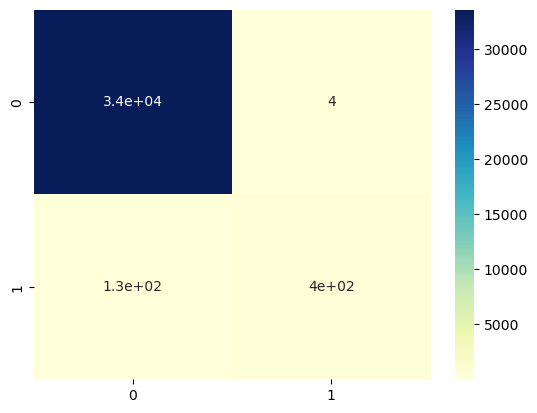

In [29]:
model_cb = CatBoostClassifier(learning_rate = 0.025)

model_cb.fit(train_X, train_y, cat_features = catFeatures, verbose = False)

pred_y = model_cb.predict(val_X)

val_probs = model_cb.predict_proba(val_X)

# Calculate accuracy of prediction using AUROC curve scores

auc_score = roc_auc_score(val_y, val_probs[:,1])

print("Model accuracy = ", accuracy_score(val_y, pred_y))
print("CatBoost AUROC = ", auc_score)

cm = pd.DataFrame(confusion_matrix(val_y, pred_y))
sns.heatmap(cm, annot = True, cmap = "YlGnBu")

In [30]:
test_df.head()

,Type,AirTemp,ProcessTemp,RotSpeed,Torque,ToolWear,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,
136429,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [31]:
pred_sub = model_cb.predict_proba(test_df)[:,1]
sub1 = pd.DataFrame(pred_sub, columns = ['Machine failure'])
ex_col = pd.DataFrame(test_df.index)
submission = ex_col.join(sub1)
submission.to_csv("submission_cb.csv", index = False)
submission.head()

,id,Machine failure
0,136429,0.001315
1,136430,0.003585
2,136431,0.001002
3,136432,0.001999
4,136433,0.001792


# Neural Network classification

In [32]:
#from tensorflow import keras
#from tensorflow.keras import layers

#model_nn = keras.Sequential([
#  layers.Dense(128, activation = 'relu', input_shape = train_X_new.shape[1])  
#])